---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
# `P5` - *Cadenas de Markov* 
## Procesos M/M/s

- Estudiantes: 
- **Jeremy Soto Víquez B97751**
- **Oscar Quesada Muñoz B86214**
- **Jose Adrián Blanco Sánchez B81161**


# *Enunciado*

> Es menester tomar una decisión con respecto al número de "servidores" necesarios para cierto proceso de vacunación, de forma tal que el sistema no exceda 50 personas en fila durante el 95% del tiempo de servicio. 

En un estudio de afluencia y del tiempo de servicio se asumen y determinan los siguientes parámetros:

- La tasa de llegada $\lambda$ es constante durante ocho horas de funcionamiento y tiene un valor de $\lambda = 4$ personas por minuto.

- La tasa de servicio $\nu$ de cada "servidor" (es decir, personal de salud tomando datos y vacunando) es constante durante ocho horas de funcionamiento y tiene un valor de $\nu = 0.25$ personas por minuto.


### Determinación teórica del número  𝑠  de servidores necesarios para cumplir los requisitos solicitados. (40%)

De los datos del enunciado tenemos que la tasa de llegada  $\lambda=4$ personas por minuto y la tasa de servicio tiene un valor de $\nu=0.25$ personas por minuto. De esta manera, partimos de la fórmula que determina la probabilidad de que se cumpla la condición de capacidad maxima, es decir que se sobrepase de 50 personas por fila:
$$P(51 \ personas \ o \ mas) = 
\sum_{i=51}^{\infty}(1-\rho)\rho^i
\$$

$$P(51 \ personas \ o \ mas) = 1-
\sum_{i=0}^{50}(1-\rho)\rho^i
\$$

$$P(51 \ personas \ o \ mas) = \rho^{51}
\$$

Tomando en cuneta que únicamente con $\rho = \lambda/(sν)$ < 1 el sistema alcanza un estado estacionario:
sustituimos en la ecuación anterior para obtener:

$$P(51 \ personas \ o \ mas) = \left(\cfrac{\lambda}{sv}\right)^{101}
\$$

Como sabemos que no se deben exceder más de 50 personas en la fila el 95% del tiempo, la condicion de ruptura se compliria para el 5\% restante, por lo tanto:

$$P(51 \ personas \ o \ mas) = \left(\cfrac{\lambda}{sv}\right)^{51} \leq 0.05
\$$

Ahora bien, despejamos para $s$:

$$s^{51}\geq \cfrac{\lambda^51}{0.05v^{51}}$$

$$s\ \geq \cfrac{\lambda}{v}\sqrt[51]{\frac{1}{105}}$$

$$s\ \geq \cfrac{4}{0.25}\cdot \sqrt[51]{\frac{1}{105}}$$

$$s\ \geq \ 16.96$$

Finalmente se puede concluir que el sistema debe tener como minimo 17 servidores para cumplir con los requisitos solicitados. 









---

### Modificar el código provisto para simular y corroborar el resultado anterior y crear al menos dos gráficas que muestren esta simulación.



Parámetro lambda = 4.0
Parámetro nu = 0.25
Cantidad de servidores = 17
Tiempo con más de 50 solicitudes en fila:
	 0.00%
	 Sí cumple con la especificación.
Simulación es equivalente a 4.36 horas.


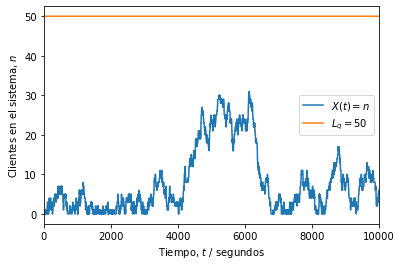

In [24]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


    
N = 1000 #Número de clientes
    
lam = 4/60 #Parámetro de llegada (clientes/segundos)
    
nu = 0.25/60 #Parámetro de servicio (servicios/segundos)
    
s = 17 #Número de servidores
    
    
# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(s*nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 51

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
            exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Cantidad de servidores =', str(s))
print('Tiempo con más de {} solicitudes en fila:'.format(P-1))
print('\t {:0.2f}%'.format(100*fraccion))
    
if fraccion <= 0.05: #Se ajusta al nuevo valor
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-1)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 10000))
plt.show()

Parámetro lambda = 4.0
Parámetro nu = 0.25
Cantidad de servidores = 16
Tiempo con más de 50 solicitudes en fila:
	 42.05%
	 No cumple con la especificación.
Simulación es equivalente a 4.41 horas.


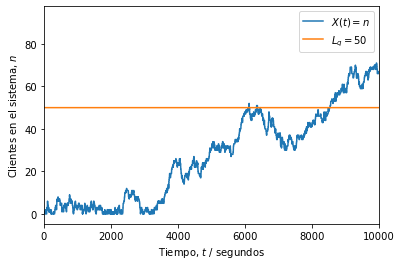

In [27]:
#A continuación se realiza una copia del codigo para probar con un valor de s = 16
N = 1000 #Número de clientes
    
lam = 4/60 #Parámetro de llegada (clientes/segundos)
    
nu = 0.25/60 #Parámetro de servicio (servicios/segundos)
    
s = 16 #Número de servidores
    
    
# Distribución de los tiempos de llegada entre cada cliente
X = stats.expon(scale = 1/lam)

# Distribución de los tiempos de servicio a cada cliente
Y = stats.expon(scale = 1/(s*nu))

# Intervalos entre llegadas (segundos desde último cliente)
t_intervalos = np.ceil(X.rvs(N)).astype('int')

# Tiempos de las llegadas (segundos desde el inicio)
t_llegadas = [t_intervalos[0]]
for i in range(1, len(t_intervalos)):
    siguiente = t_llegadas[i-1] + t_intervalos[i]
    t_llegadas.append(siguiente)

# Tiempos de servicio (segundos desde inicio de servicio)
t_servicio = np.ceil(Y.rvs(N)).astype('int')

# Inicialización del tiempo de inicio y fin de atención
inicio = t_llegadas[0]          # primera llegada
fin = inicio + t_servicio[0]    # primera salida

# Tiempos en que recibe atención cada i-ésimo cliente (!= que llega)
t_atencion = [inicio]
for i in range(1, N):
        inicio = np.max((t_llegadas[i], fin))
        fin = inicio + t_servicio[i]
        t_atencion.append(inicio)

# Inicialización del vector temporal para registrar eventos
t = np.zeros(t_atencion[-1] + t_servicio[-1] + 1)

# Asignación de eventos de llegada (+1) y salida (-1) de clientes
for c in range(N):
    i = t_llegadas[c]
    t[i] += 1
    j = t_atencion[c] + t_servicio[c]
    t[j] -= 1

# Umbral de P o más personas en sistema (hay P - 1 en fila)
P = 51

# Instantes (segundos) de tiempo con P o más solicitudes en sistema
exceso = 0

# Proceso aleatorio (estados n = {0, 1, 2...})
Xt = np.zeros(t.shape)

# Inicialización de estado n
n = 0

# Recorrido del vector temporal y conteo de clientes (estado n)
for i, c in enumerate(t):
    n += c # sumar (+1) o restar (-1) al estado
    Xt[i] = n
    if Xt[i] >= P: 
            exceso += 1

# Fracción de tiempo con P o más solicitudes en sistema
fraccion = exceso / len(t)

# Resultados
print('Parámetro lambda =', str(lam*60))
print('Parámetro nu =', str(nu*60))
print('Cantidad de servidores =', str(s))
print('Tiempo con más de {} solicitudes en fila:'.format(P-1))
print('\t {:0.2f}%'.format(100*fraccion))
    
if fraccion <= 0.05: #Se ajusta al nuevo valor
    print('\t Sí cumple con la especificación.')
else:
    print('\t No cumple con la especificación.') 
print('Simulación es equivalente a {:0.2f} horas.'.format(len(t)/3600))

# Gráfica de X(t) (estados del sistema)
plt.figure()
plt.plot(Xt)
plt.plot(range(len(t)), (P-1)*np.ones(t.shape))
plt.legend(('$X(t) = n$', '$L_q = $' + str(P-1)))
plt.ylabel('Clientes en el sistema, $n$')
plt.xlabel('Tiempo, $t$ / segundos')
plt.xlim((0, 10000))
plt.show()

---
Como se puede observar del gráfico realizado con s = 16 no cumplio como era esperado, ya que era una posibilidad al tener que el minimo tiene que ser de 16,97.

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---